<a href="https://colab.research.google.com/github/Danjstr/DAV100_Exploratory-Data-Analysis-of-Darwin-s-Finches/blob/master/Finch_Beaks_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following sample is an Exploratory Data Analysis of finch beak size and depth. These Finches are not coincidentally the descendants of Darwin's original study of evolution.

Import necessary dependencies

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


Note: This analysis is performed in Google Colab. As such import of the following CSV files may be functionally different if this code is run outside Google Colab. This data set is open source and can be easily accessed at https://www.kaggle.com/crbelhekar619/darwins-finches-evolution-dataset

In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving finch_beaks_2012.csv to finch_beaks_2012 (3).csv


Read in the CSV files and append a column to them for the year these data sets were measured. This column is objectively unnecessary but will be useful later while doing visual EDA.

Finally, print the first five rows of each data set to visually inspect the data.
In addition, you can use the describe and info functions if you are looking for more specific details about the data set and its structure. 

In [ ]:
df0 = pd.read_csv ('finch_beaks_1975.csv')
df0['year']= 1975
print (df0.head())
df0.describe()
df0.info()


df1 = pd.read_csv ('finch_beaks_2012.csv')
df1['year']= 2012
print (df1.head())
df1.describe()
df1.info()

   band species  Beak length, mm  Beak depth, mm  year
0     2  fortis              9.4             8.0  1975
1     9  fortis              9.2             8.3  1975
2    12  fortis              9.5             7.5  1975
3    15  fortis              9.5             8.0  1975
4   305  fortis             11.5             9.9  1975
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             403 non-null    int64  
 1   species          403 non-null    object 
 2   Beak length, mm  403 non-null    float64
 3   Beak depth, mm   403 non-null    float64
 4   year             403 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.9+ KB
    band species  blength  bdepth  year
0  19022  fortis     10.0     8.5  2012
1  19028  fortis     12.5     8.9  2012
2  19032  fortis      9.3     7.5  2012
3  19041  fortis     

EDA Beak Depth and Length from 1975. 
Important notes: Both species seem to have an overlap of beak depth. This is indicated by the homogenous red cluster in the bee swarm plot. However, there is a clear divide in Beak Length. We can make a simple hypothesis that this is a consequence caused by the varying species.

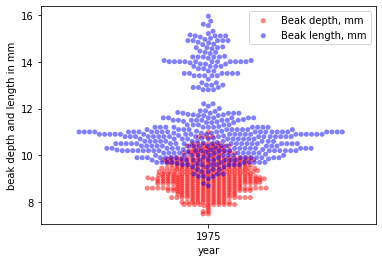

In [ ]:
# Create bee swarm plot for 1975
_ = sns.swarmplot(x='year',y='Beak depth, mm',data=df0,color='red',alpha=0.5)
_ = sns.swarmplot(x='year',y='Beak length, mm',data=df0,color='blue',alpha=0.5)
# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth and length in mm')
_ = plt.legend(['Beak depth, mm','Beak length, mm'])

# Show the plot
plt.show()

Now, let's view the EDA of Beak Depth and Length from 1975 colored by species so we can confirm that the divide in Beak Length is, in fact, a result of the varying species.
 
As expected: The result confirms our hypothesis. The bottom cluster corresponding to Beak Depth is a homogenous mix of the two species and the cluster corresponding to beak length is divided by species.

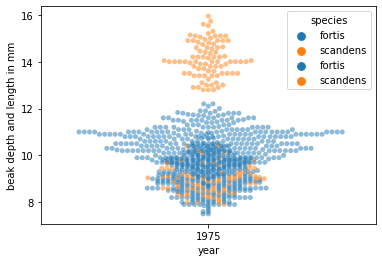

In [ ]:
# Create bee swarm plot for 1975
_ = sns.swarmplot(x='year',y='Beak depth, mm',data=df0,alpha=0.5,hue='species')
_ = sns.swarmplot(x='year',y='Beak length, mm',data=df0,alpha=0.5,hue='species')
# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth and length in mm')


# Show the plot
plt.show()

EDA Beak Depth and Length from 2012. Important notes: Both species seem to have an overlap of Beak Depth. This is indicated by the homogenous green cluster in the bee swarm plot (similar to the plot of our 1975 beak depth data). However, here is where things begin to differ from our 1975 data. While there are clearly still two distinct sections of the Beak Length data they are no longer entirely separated from one another. It seems apparent that the noticeable cap in Beak Length between the species has begun to close between 1975 and 2012.

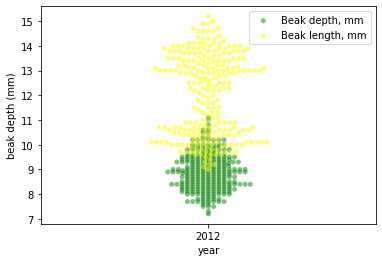

In [ ]:
# Create bee swarm plot for 2012
_ = sns.swarmplot(x='year',y='bdepth',data=df1,color='green', alpha=0.5)
_ = sns.swarmplot(x='year',y='blength',data=df1,color='yellow', alpha=0.5)
# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(['Beak depth, mm','Beak length, mm'])

# Show the plot
plt.show()

Now, let's view the EDA of Beak depth and length from 2012 colored by species so we can confirm that the merging of the beak length sections is, in fact, a result of the varying species beak lengths merging. 

As expected: The result confirms our theory. The bottom cluster corresponding to Beak Depth is again a homogenous mix of the two species. While the cluster corresponding to Beak Length has begun merging since 1975. The reason is hard to guess from the data though we might speculate that the change is a result of interbreeding between the two varieties of finch species.

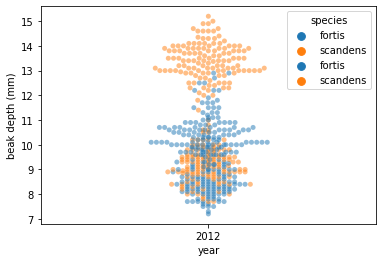

In [ ]:
# Create bee swarm plot for 2012
_ = sns.swarmplot(x='year',y='bdepth',data=df1, alpha=0.5, hue='species')
_ = sns.swarmplot(x='year',y='blength',data=df1, alpha=0.5, hue='species')
# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

Generate Numpy arrays of Beak Depth and Beak Length for 1975 and 2012

In [ ]:
bd_1975=np.array(df0['Beak depth, mm'])
bl_1975=np.array(df0['Beak length, mm'])

bd_2012=np.array(df1['bdepth'])
bl_2012=np.array(df1['blength'])

Define an Empirical Cumulative Distribution Function(ECDF)



In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


Use your defined ECDF function to plot an Empirical Cumulative Distribution Function of Beak Depth to compare distributions between 1975 and 2012.

The results seem to indicate that there is an overall decrease in beak depth between 1975 and 2012.

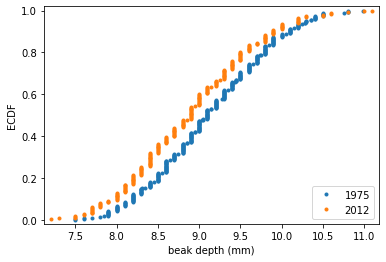

In [ ]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

Use your defined ECDF function to plot an Empirical Cumulative Distribution Function of Beak Length to compare distributions between 1975 and 2012.

The results here are a bit unexpected. The results indicate that there is an overall increase in beak length between 1975 and 2012.
In fact, the plot seems to indicate that between the 40th and 80th percentile the increase in beak length over the years was dramatic.

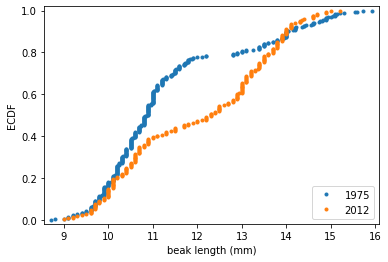

In [ ]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bl_1975)
x_2012, y_2012 = ecdf(bl_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

Note: The two Empirical Cumulative Distribution Function above lump the species data together. This could potentially make the plots above overgeneralized. For more accurate results, one might consider printing ECDF's for Fortis Beak Depth, Fortis Beak Length, Scandens Beak Depth, and Scandens Beak Length respectively.

Define two functions. The first one will generate a bootstrap replicate, and the second one will take in the first one using a for loop to generates many bootstrap replicates from the data set.

In [ ]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

Calculate the difference between the means of the Beak Depth data between 1975 and 2012. Generate 95% confidence intervals using bootstrap replicates.

In [ ]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012)-np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012- bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')


difference of means = -0.22313275434243174 mm
95% confidence interval = [-0.33679722 -0.10614446] mm


Do the same for Beak Length. Calculate the difference between the means between 1975 and 2012 and generate 95% confidence intervals using bootstrap replicates.

In [ ]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bl_2012)-np.mean(bl_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bl_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bl_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012- bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.6715105459057078 mm
95% confidence interval = [0.41033328 0.92596379] mm


Provide a scatter plot of Beak Length vs Beak Depth colored by year. Again, we seem to see a distinct divide among the data. We confirmed earlier in the bee swarm plots that this was likely a result of the different species. Still, it doesn't hurt to double-check. The second scatter blot is colored by species instead of the year.

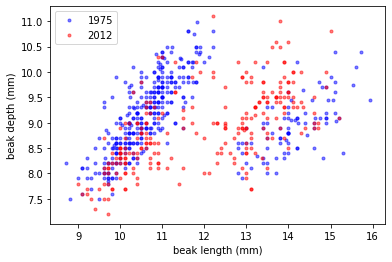

In [ ]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975,bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

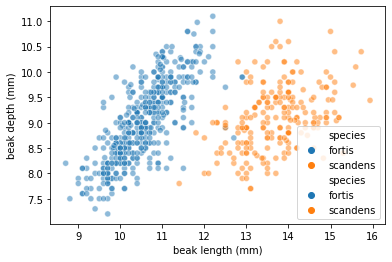

In [ ]:
 # Make scatter plot of 1975 data
_ = sns.scatterplot(bl_1975,bd_1975, data=df0, alpha=0.5,hue='species')

# Make scatter plot of 2012 data
_ = sns.scatterplot(bl_2012, bd_2012,data=df1, alpha=0.5, hue='species')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

Define a function that will generate a pairs bootstrap replicate of the data set.

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

Compute the linear regression. Then compute and print two sets of confidence intervals for each the bootstrap replicates of the 1975 data and another for the bootstrap replicates of the 2012 data.

In [ ]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg( bl_1975,bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
draw_bs_pairs_linreg( bl_2012,bd_2012, size=1000)

# Compute confidence intervals of slopes

slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.09459683208921148 conf int = [0.05471709 0.13272985]
1975: intercept = 8.053907980716426 conf int = [7.61840976 8.50524276]
2012: slope = 0.279421483961125 conf int = [0.23685844 0.31974934]
2012: intercept = 5.548559204612315 conf int = [5.06099439 6.05785389]


Display the results of the linear regression

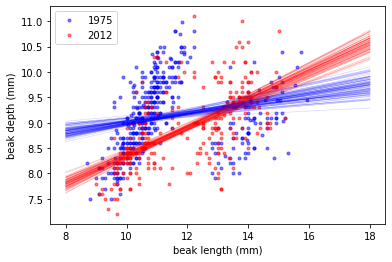

In [ ]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([8, 18])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

Calculate the Beak Length to Depth ratio. Then Calculate 99% confidence intervals.

In [ ]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975  
ratio_2012 = bl_2012/bd_2012

# Compute the mean of the ratios
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)



1975: mean ratio = 1.2461609991094327 conf int = [1.22343581 1.27107276]
2012: mean ratio = 1.3483617710027853 conf int = [1.32362407 1.37278531]
